In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [49]:
train = pd.read_csv('../00_Data/train.tsv', sep='\t')

In [50]:
del train['id']

In [51]:
train.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.530,0.435,0.155,0.6990,0.2880,0.1595,0.205,10
1,F,0.710,0.565,0.195,1.8170,0.7850,0.4920,0.490,11
2,F,0.625,0.520,0.180,1.3540,0.4845,0.3510,0.375,11
3,M,0.375,0.280,0.095,0.2225,0.0875,0.0430,0.080,10
4,I,0.415,0.330,0.090,0.3595,0.1700,0.0810,0.090,6


## 相関を見る

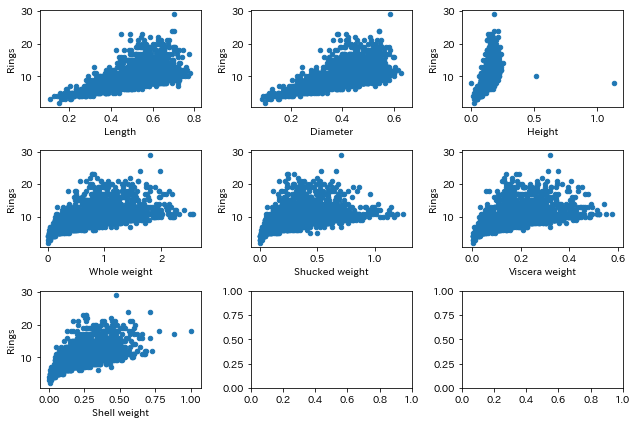

In [52]:
fig, ax = plt.subplots(3, 3, figsize=(9,6))

train.plot.scatter(x='Length',         y='Rings', ax=ax[0][0])
train.plot.scatter(x='Diameter',       y='Rings', ax=ax[0][1])
train.plot.scatter(x='Height',         y='Rings', ax=ax[0][2])
train.plot.scatter(x='Whole weight',   y='Rings', ax=ax[1][0])
train.plot.scatter(x='Shucked weight', y='Rings', ax=ax[1][1])
train.plot.scatter(x='Viscera weight', y='Rings', ax=ax[1][2])
train.plot.scatter(x='Shell weight',   y='Rings', ax=ax[2][0])

plt.tight_layout()

## 分布を見る

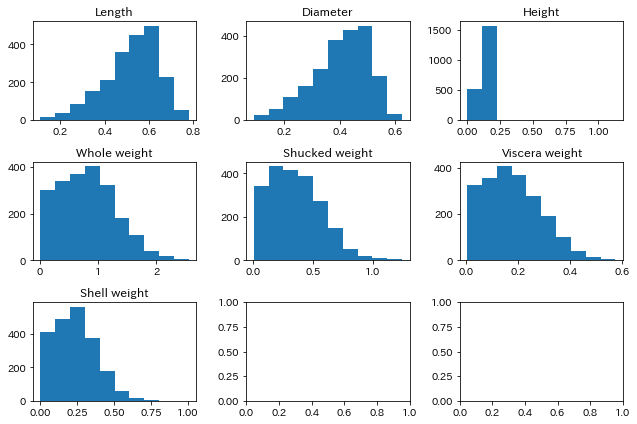

In [53]:
fit, ax = plt.subplots(3, 3, figsize=(9,6))

ax[0][0].hist(train['Length'])
ax[0][0].set_title('Length')
ax[0][1].hist(train['Diameter'])
ax[0][1].set_title('Diameter')
ax[0][2].hist(train['Height'])
ax[0][2].set_title('Height')
ax[1][0].hist(train['Whole weight'])
ax[1][0].set_title('Whole weight')
ax[1][1].hist(train['Shucked weight'])
ax[1][1].set_title('Shucked weight')
ax[1][2].hist(train['Viscera weight'])
ax[1][2].set_title('Viscera weight')
ax[2][0].hist(train['Shell weight'])
ax[2][0].set_title('Shell weight')

plt.tight_layout()

## 外れ値を除去する（3sigma）

In [54]:
columns = ('Length','Diameter','Height','Whole weight',
           'Shucked weight','Viscera weight','Shell weight')

for column in columns:
    std  = np.std(train[column])
    mean = np.mean(train[column])
    train = train[(mean - 3*std <= train[column]) & (train[column] <= mean + 3*std)]

len(train)

2044

In [55]:
train.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.530,0.435,0.155,0.6990,0.2880,0.1595,0.2050,10
2,F,0.625,0.520,0.180,1.3540,0.4845,0.3510,0.3750,11
3,M,0.375,0.280,0.095,0.2225,0.0875,0.0430,0.0800,10
4,I,0.415,0.330,0.090,0.3595,0.1700,0.0810,0.0900,6
5,F,0.680,0.520,0.185,1.5410,0.5985,0.3950,0.4575,10


In [58]:
train = pd.get_dummies(train)

In [59]:
train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.530,0.435,0.155,0.6990,0.2880,0.1595,0.2050,10,0,0,1
2,0.625,0.520,0.180,1.3540,0.4845,0.3510,0.3750,11,1,0,0
3,0.375,0.280,0.095,0.2225,0.0875,0.0430,0.0800,10,0,0,1
4,0.415,0.330,0.090,0.3595,0.1700,0.0810,0.0900,6,0,1,0
5,0.680,0.520,0.185,1.5410,0.5985,0.3950,0.4575,10,1,0,0


In [63]:
x_train = train.drop('Rings', axis=1)

In [65]:
y_train = train.iloc[:, 7:8]

## 予測する

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
model = RandomForestRegressor(random_state=0)

In [77]:
import warnings
warnings.filterwarnings('ignore')
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [78]:
test = pd.read_csv('../00_Data/test.tsv', sep='\t')

In [79]:
del test['id']

In [80]:
test = pd.get_dummies(test)

In [81]:
test.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.710,0.570,0.195,1.9805,0.9925,0.4925,0.4800,1,0,0
1,0.485,0.395,0.160,0.6600,0.2475,0.1280,0.2350,1,0,0
2,0.700,0.580,0.205,2.1300,0.7415,0.4900,0.5800,0,0,1
3,0.670,0.525,0.190,1.5270,0.5755,0.3530,0.4400,1,0,0
4,0.435,0.300,0.120,0.5965,0.2590,0.1390,0.1645,0,1,0


In [82]:
pred = model.predict(test)

In [83]:
pred

array([11.7, 12.7, 12.7, ..., 12.8, 14.6, 11.1])

In [84]:
pred = np.round(pred).astype(int)

In [85]:
sample = pd.read_csv('../00_Data/sample_submit.csv', header=None)

In [87]:
sample.head()

,0,1
0,1,9
1,2,17
2,4,17
3,5,17
4,6,14


In [88]:
sample[1] = pred

In [89]:
sample.head()

,0,1
0,1,12
1,2,13
2,4,13
3,5,14
4,6,10


In [90]:
sample.to_csv('../80_submit/submit.csv', header=False, index=False)